In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

/home/josejoao/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dfTweets = pd.read_csv('../data/preprocessedTweets.csv')

dfTweets.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
dfTweets.columns

Index(['Unnamed: 0.1', 'Date', 'TweetURL', 'User', 'Source', 'Location',
       'Tweet', 'Likes_Count', 'Retweet_Count', 'Quote_Count', 'Reply_Count',
       'compoundVader', 'compoundTextBlob', 'compoundRoBERTa', 'Tweet_NLTK',
       'Sentiment'],
      dtype='object')

In [4]:
dfMarket = pd.read_csv('../data/price_mining.csv')

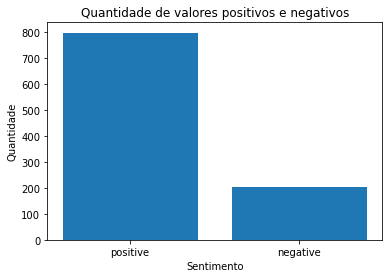

In [5]:
# Contar a quantidade de valores positivos e negativos
count = dfTweets["Sentiment"].value_counts()

# Criar o gráfico de barras
plt.bar(count.index, count.values)

# Adicionar títulos e rótulos dos eixos
plt.title("Quantidade de valores positivos e negativos")
plt.xlabel("Sentimento")
plt.ylabel("Quantidade")

# Mostrar o gráfico
plt.show()

#### Bullish Ratio analysis

Tweet’s bullish ratio is known as the number of positive tweets over a number of negative tweets.

A bullish ratio greater than one indicates audiences’ belief that the cryptocurrency’s return will increase. Otherwise, a value lower than one shows greater negativity towards the cryptocurrency and the market will be pulled back in near future

In [6]:
bullishRatio = count[0] / count[1]
print("Razão de tweets positivos para negativos: ", bullishRatio)

Razão de tweets positivos para negativos:  3.9504950495049505


#### Cast tweets date to datetime type

In [7]:
dfTweets["Date"] = pd.to_datetime(dfTweets["Date"])

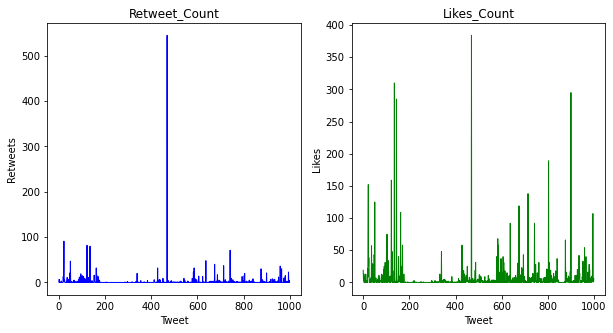

In [8]:
# Definir tamanho da figura
plt.figure(figsize=(10, 5))

# Primeiro gráfico para Retweet_Count
plt.subplot(1, 2, 1)
plt.plot(dfTweets["Retweet_Count"], color="blue", linewidth=1)
plt.title("Retweet_Count")
plt.xlabel("Tweet")
plt.ylabel("Retweets")

# Segundo gráfico para Likes_Count
plt.subplot(1, 2, 2)
plt.plot(dfTweets["Likes_Count"], color="green", linewidth=1)
plt.title("Likes_Count")
plt.xlabel("Tweet")
plt.ylabel("Likes")

# Exibir os gráficos
plt.show()


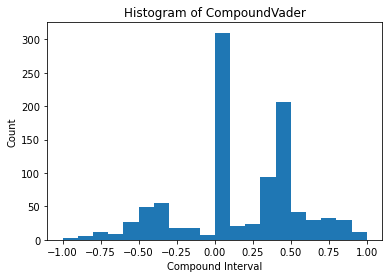

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Criando os intervalos de 0,1 de -1 a 1
bins = np.arange(-1, 1.1, 0.1)

# Plotando o gráfico de barras
plt.hist(dfTweets['compoundVader'], bins=bins)
plt.xlabel('Compound Interval')
plt.ylabel('Count')
plt.title('Histogram of CompoundVader')
plt.show()


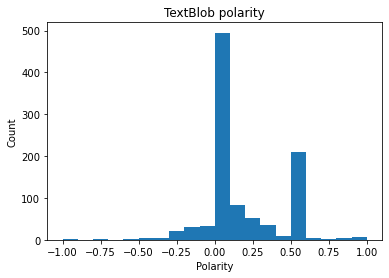

In [10]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# aplicando expressão regular para extrair o valor da polaridade
dfTweets['polarity'] = dfTweets['compoundTextBlob'].apply(lambda x: float(re.search(r'polarity=(-?\d+\.?\d*)', x).group(1)))

# criando um histograma com a polaridade
fig, ax = plt.subplots()
ax.set_title('TextBlob polarity')
ax.hist(dfTweets['polarity'], bins=20)
ax.set_xlabel('Polarity')
ax.set_ylabel('Count')
plt.show()


#### Check compound variance over time

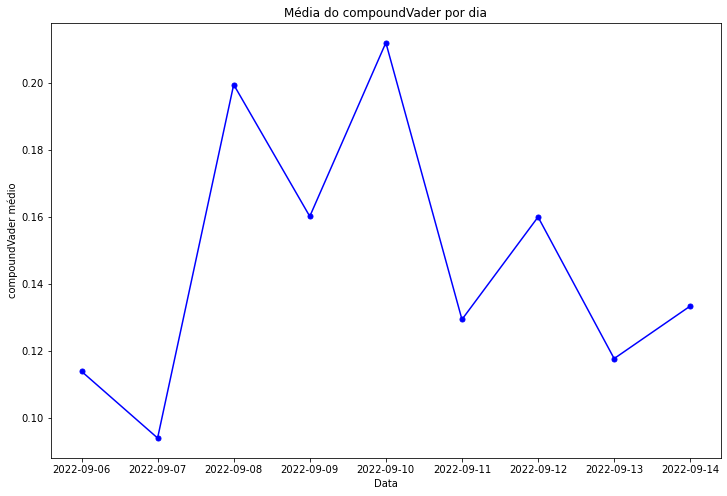

In [11]:
dfTweets['Date'] = pd.to_datetime(dfTweets['Date']).dt.date

df_daily = dfTweets.groupby('Date')['compoundVader'].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(df_daily['Date'], df_daily['compoundVader'], color='blue', marker='o', markersize=5)

ax.set_xlabel('Data')
ax.set_ylabel('compoundVader médio')
ax.set_title('Média do compoundVader por dia')
plt.show()


#### Check price variance over time

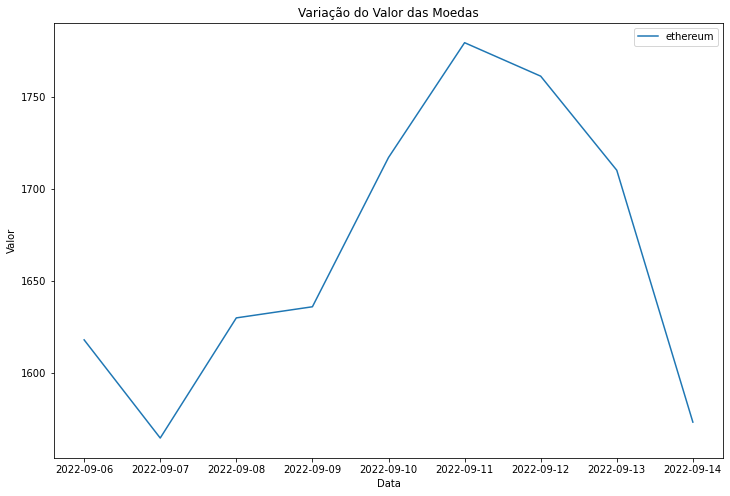

In [12]:
dfMarket = dfMarket[(dfMarket['datetime'] >= '2022-09-06') & (dfMarket['datetime'] <= '2022-09-14')]


df_daily = dfMarket.groupby(['Date', 'currency_name'])['Value'].agg('mean').reset_index()


fig, ax = plt.subplots(figsize=(12, 8))

for currency in df_daily['currency_name'].unique():
    df_currency = df_daily[df_daily['currency_name'] == currency]
    ax.plot(df_currency['Date'], df_currency['Value'], label=currency)

ax.set_xlabel('Data')
ax.set_ylabel('Valor')
ax.set_title('Variação do Valor das Moedas')
ax.legend()
plt.show()


#### Gráfico comparativo entre Sentimento dos tweets e valor da Criptomoeda

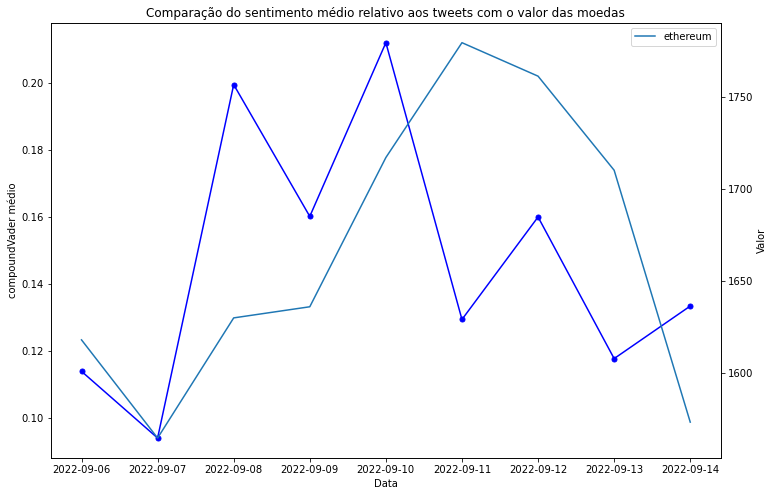

In [13]:
dfTweets['Date'] = pd.to_datetime(dfTweets['Date'])
dfMarket['Date'] = pd.to_datetime(dfMarket['Date'])



df_tweets_daily = dfTweets.groupby(dfTweets['Date'].dt.date)['compoundVader'].mean().reset_index()
df_market_daily = dfMarket.groupby(['Date', 'currency_name'])['Value'].mean().reset_index()



fig, ax1 = plt.subplots(figsize=(12,8))
# plotar o gráfico para a média do compoundVader
ax1.plot(df_tweets_daily['Date'], df_tweets_daily['compoundVader'], color='blue', marker='o', markersize=5)
ax1.set_xlabel('Data')
ax1.set_ylabel('compoundVader médio')
ax1.set_title('Comparação do sentimento médio relativo aos tweets com o valor das moedas')

# criar um segundo eixo y para o valor médio das moedas
ax2 = ax1.twinx()

# plotar o gráfico para o valor médio das moedas
for currency in df_market_daily['currency_name'].unique():
    df_currency = df_market_daily[df_market_daily['currency_name'] == currency]
    ax2.plot(df_currency['Date'], df_currency['Value'], label=currency)
    
ax2.set_ylabel('Valor')
ax2.legend()
plt.show()


##### Agora aplicando um atraso de 1 dia no preço da criptomoeda

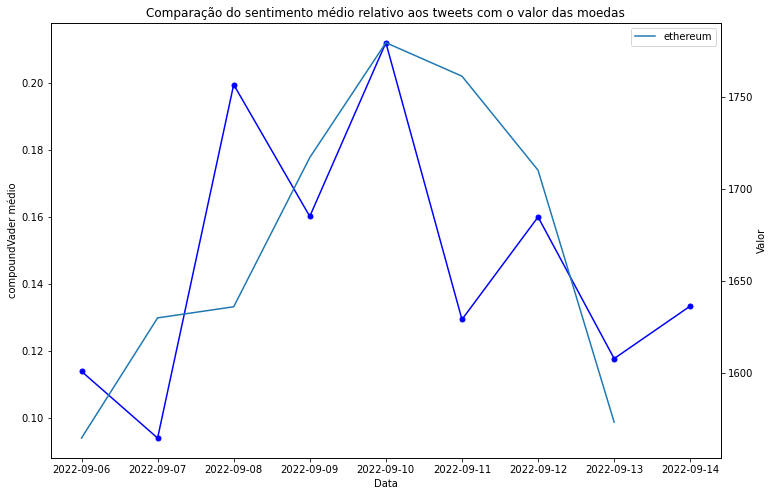

In [14]:
dfTweets['Date'] = pd.to_datetime(dfTweets['Date'])
dfMarket['Date'] = pd.to_datetime(dfMarket['Date'])

df_tweets_daily = dfTweets.groupby(dfTweets['Date'].dt.date)['compoundVader'].mean().reset_index()

df_market_daily = dfMarket.groupby(['Date', 'currency_name'])['Value'].mean().reset_index()
df_market_daily['Value'] = df_market_daily.groupby('currency_name')['Value'].shift(-1)      # Passar um dia para trás os dados do valor de mercado

fig, ax1 = plt.subplots(figsize=(12,8))

# plotar o gráfico para a média do compoundVader
ax1.plot(df_tweets_daily['Date'], df_tweets_daily['compoundVader'], color='blue', marker='o', markersize=5)
ax1.set_xlabel('Data')
ax1.set_ylabel('compoundVader médio')
ax1.set_title('Comparação do sentimento médio relativo aos tweets com o valor das moedas')

# criar um segundo eixo y para o valor médio das moedas
ax2 = ax1.twinx()

# plotar o gráfico para o valor médio das moedas
for currency in df_market_daily['currency_name'].unique():
    df_currency = df_market_daily[df_market_daily['currency_name'] == currency]
    ax2.plot(df_currency['Date'], df_currency['Value'], label=currency)
    
ax2.set_ylabel('Valor')
ax2.legend()
plt.show()


#### Calculate correlation between both

In [15]:
# Agrupa os dados da criptomoeda por dia e calcula a média diária do valor
dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

# Agrupa os dados dos tweets por dia e calcula a contagem diária e a média diária do compoundVader
dfTweets_daily = dfTweets.groupby('Date').agg({'Tweet': 'count', 'compoundVader': 'mean'}).reset_index()
dfTweets_daily = dfTweets_daily.rename(columns={'Tweet': 'Tweets'})

# Junta os dados da criptomoeda e dos tweets em uma só tabela, usando a coluna 'Date' como chave
df_merged = pd.merge(dfMarket_daily, dfTweets_daily, on='Date')

# Calcula a correlação entre o valor diário da criptomoeda e a média diária do compoundVader
corr = df_merged['Value'].corr(df_merged['compoundVader'])

print('Correlação: {:.2f}'.format(corr))

Correlação: 0.29


##### Então, iremos aplicar uma regressão linear para que se possa verificar se o valor obtido na correlação é significativo

In [16]:
import statsmodels.api as sm

# Agrupa os dados da criptomoeda por dia e calcula a média diária do valor
dfMarket_daily = dfMarket.groupby('Date')['Value'].mean().reset_index()

# Agrupa os dados dos tweets por dia e calcula a contagem diária e a média diária do compoundVader
dfTweets_daily = dfTweets.groupby('Date').agg({'Tweet': 'count', 'compoundVader': 'mean'}).reset_index()
dfTweets_daily = dfTweets_daily.rename(columns={'Tweet': 'Tweets'})

# Junta os dados da criptomoeda e dos tweets em uma só tabela, usando a coluna 'Date' como chave
df_merged = pd.merge(dfMarket_daily, dfTweets_daily, on='Date')

# Aplica a regressão linear
X = sm.add_constant(df_merged['compoundVader'])
model = sm.OLS(df_merged['Value'], X)
results = model.fit()

# Imprime os resultados da regressão linear
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                    0.6298
Date:                Fri, 19 May 2023   Prob (F-statistic):              0.453
Time:                        17:09:56   Log-Likelihood:                -51.180
No. Observations:                   9   AIC:                             106.4
Df Residuals:                       7   BIC:                             106.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1581.6892    109.011     14.509

/home/josejoao/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Calculate cross correlation

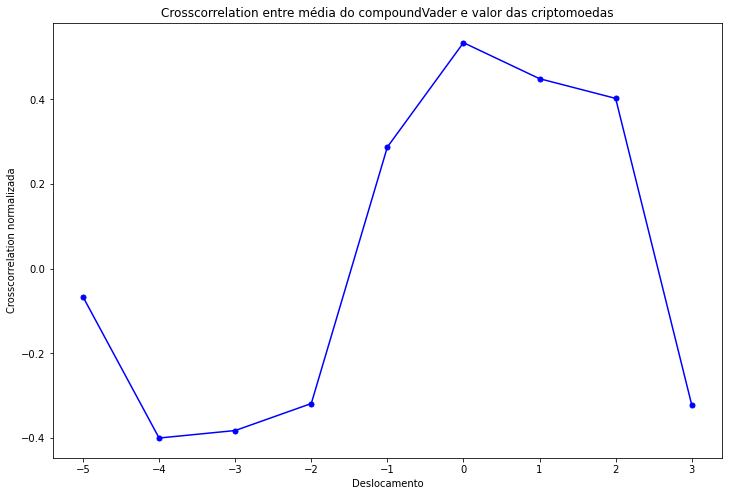

In [17]:
import numpy as np

# extrair valores relevantes do dataset de tweets e de criptomoedas
tweets_daily = dfTweets.groupby('Date')['compoundVader'].mean().values

crypto_daily = dfMarket.groupby('Date')['Value'].mean().values

# calcular a crosscorrelation e normalizar o resultado
crosscorr = np.correlate(crypto_daily - crypto_daily.mean(), tweets_daily - tweets_daily.mean(),  mode='same') / np.sqrt(np.sum((tweets_daily - tweets_daily.mean())**2) * np.sum((crypto_daily - crypto_daily.mean())**2))

# plot da crosscorrelation
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(np.arange(-len(crypto_daily) // 2, len(crypto_daily) // 2), crosscorr, color='blue', marker='o', markersize=5)

ax.set_xlabel('Deslocamento')
ax.set_ylabel('Crosscorrelation normalizada')
ax.set_title('Crosscorrelation entre média do compoundVader e valor das criptomoedas')
plt.show()


#### Granger Causality Tests

Uma vez que a correlação não implica necessariamente causalidade, aplica-se em seguida testes de causalidade.

Granger Causality test is a statistical test that is used to determine if a given time series and it’s lags is helpful in explaining the value of another series.

That is, the Granger Causality can be used to check if a given series is a leading indicator of a series we want to forecast/predict.

In [27]:
# dfTweets['compoundVader'].isnull().values.any()

# print(np.isinf(dfTweets['compoundVader']).any()) 

In [66]:
# tweets_daily = dfTweets.groupby('Date')['compoundVader'].mean().values
dfTweets['Date'] = pd.to_datetime(dfTweets['Date'])
tweets_daily = dfTweets.groupby(dfTweets['Date'].dt.date)['compoundVader'].mean().reset_index()

dfMarket_daily = dfMarket[(dfMarket['Date'] >= '2022-09-06') & (dfMarket['Date'] <= '2022-09-14')]
dfMarket_daily = dfMarket_daily.groupby('Date')['Value'].mean().reset_index()

x = np.array(dfMarket_daily["Value"])
y = np.array(tweets_daily["compoundVader"])

print("Dimensão de x:", x.shape)
print("Dimensão de y:", y.shape)


print(y)
print(x)


Dimensão de x: (9,)
Dimensão de y: (9,)
[0.113824   0.09388487 0.19954118 0.1601433  0.21207667 0.12932778
 0.15996786 0.11763643 0.13334   ]
[1617.93545549 1564.55895403 1629.88323116 1635.93217601 1717.07695698
 1779.51902888 1761.31735588 1710.16429085 1573.2052137 ]


In [67]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

dfTweets['Date'] = pd.to_datetime(dfTweets['Date'])
tweets_daily = dfTweets.groupby(dfTweets['Date'].dt.date)['compoundVader'].mean().reset_index()

dfMarket_daily = dfMarket[(dfMarket['Date'] >= '2022-09-06') & (dfMarket['Date'] <= '2022-09-14')]
dfMarket_daily = dfMarket_daily.groupby('Date')['Value'].mean().reset_index()

x = np.array(dfMarket_daily["Value"])
y = np.array(tweets_daily["compoundVader"])

data = pd.DataFrame({'x': x, 'y': y})
results = grangercausalitytests(data, maxlag=1)
lag1_results = results[1]
print("Granger Causality (lag 1) - Test statistic:", lag1_results[0]['ssr_ftest'][0])
print("Granger Causality (lag 1) - p-value:", lag1_results[0]['ssr_ftest'][1])



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6989  , p=0.2492  , df_denom=5, df_num=1
ssr based chi2 test:   chi2=2.7183  , p=0.0992  , df=1
likelihood ratio test: chi2=2.3401  , p=0.1261  , df=1
parameter F test:         F=1.6989  , p=0.2492  , df_denom=5, df_num=1
Granger Causality (lag 1) - Test statistic: 1.6989433947173023
Granger Causality (lag 1) - p-value: 0.2492140050774858


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests, array_like

# Extrair as séries temporais de interesse
x = dfMarket['Value']
y = dfTweets['compoundVader']

x2 = array_like(pd.concat([x, y], axis=1), "x", ndim=2)
print(np.isfinite(x2).all())

# Executar o teste de causalidade de Granger
results = grangercausalitytests(pd.concat([x, y], axis=0), maxlag=10)   #TODO: tinha aqui axis = 1, mas não funcionou

# Imprimir os resultados
for lag in results.keys():
    print(f"Lag: {lag}")
    print(f"  F-statistic: {results[lag][0]['ssr_ftest'][0]}")
    print(f"  p-value: {results[lag][0]['ssr_ftest'][1]}")
    print(f"  df_denom: {results[lag][0]['ssr_ftest'][2]}")
    print(f"  ssr_chi2test: {results[lag][0]['ssr_chi2test'][0]}")
    print(f"  p-value: {results[lag][0]['ssr_chi2test'][1]}")
    print(f"  df: {results[lag][0]['ssr_chi2test'][2]}")

In [ ]:
# np.all(np.isfinite(x))

#### Autoencoder (professor disse que não fazia muito sentido porque não é algo certo, mas sim baseado em "achismos" dos utilizadores)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.layers import Input, Dense
# from tensorflow.keras.models import Model

# # Agregar os dados por dia
# df_daily = dfMarket.groupby(['Date', 'currency_name'])['Value'].mean().reset_index()

# # Transformar os dados em uma matriz numpy
# X = df_daily.pivot(index='Date', columns='currency_name', values='Value').values

# # Normalizar os dados
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Definir a arquitetura do autoencoder
# input_dim = X.shape[1]
# hidden_dim = 10

# input_layer = Input(shape=(input_dim,))
# hidden_layer = Dense(hidden_dim, activation='relu')(input_layer)
# output_layer = Dense(input_dim, activation='linear')(hidden_layer)

# autoencoder = Model(inputs=input_layer, outputs=output_layer)

# # Compilar o modelo
# autoencoder.compile(optimizer='adam', loss='mse')

# # Treinar o modelo
# autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=32)

# # Codificar os dados
# encoder = Model(inputs=input_layer, outputs=hidden_layer)
# X_encoded = encoder.predict(X_scaled)

# # Imprimir a forma dos dados codificados
# print(X_encoded.shape)

----
#### Datas presentes no dataset

In [ ]:
df1 = pd.read_csv('../data/bullishTweets.csv')
df1['Date'] = pd.to_datetime(dfTweets['Date']).dt.date
df1["Date"].unique()

array([datetime.date(2022, 9, 9), datetime.date(2022, 9, 11),
       datetime.date(2022, 9, 13), datetime.date(2022, 9, 12),
       datetime.date(2022, 9, 14), datetime.date(2022, 9, 10),
       datetime.date(2022, 9, 7), datetime.date(2022, 9, 8),
       datetime.date(2022, 9, 6)], dtype=object)

### TODO:
- Aplicar sliding window de 1 dia no grafico que compara os dois
- Utilizar linear regression para previsao de preços
- Aplicar linear regression para verificar a correlacao se é significante ou nao 
- scikit com x-> tweet e y-> valor crypto

usar o predict para a sliding window e comparar o ŷ com o valor real
- p = pos - neg (usar a que estava a fazer que dá {'neg': 0.9763551, 'neu': 0.020687457, 'pos': 0.0029573673})